# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [7]:
# import the necessary libraries
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [2]:
ans1 = .4*.7
ans2 = .7+.5-.28
ans3 = .28/.5
ans4 = .22/(.22+.08)

print(ans1)
print(ans2)
print(ans3)
print(ans4)

0.27999999999999997
0.9199999999999999
0.56
0.7333333333333334


### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [9]:
import math
from scipy.special import comb
ans1 = 8/52
ans2 = math.factorial(52)/(math.factorial(47)*math.factorial(5))
ans3 = comb(26,2)*comb(26,3)/comb(52,5)

print(ans1)
print(ans2)
print(ans3)

0.15384615384615385
2598960.0
0.3251300520208083


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [10]:
def probability_of_scoring_k(n, p, k):
    part1 = math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    part2 = p**k
    part3 = (1-p)**(n-k)
    return part1*part2*part3 

    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [11]:
ans2 = probability_of_scoring_k(22, 12/52, 8)
ans2

0.06532117736042573

3. Plot the probability mass function of $k$ in 22 draws.


<BarContainer object of 23 artists>

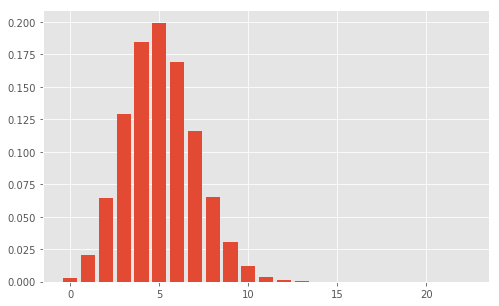

In [12]:
%matplotlib inline

pmf_k = list(range(0,23))
pmf_prob_k = []
for i in range(0,23):
    prob = probability_of_scoring_k(22, 12/52, i)
    pmf_prob_k.append(prob)
    
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(pmf_k, pmf_prob_k)

4. Plot the cumulative density function of $k$ in 22 draws.

<BarContainer object of 23 artists>

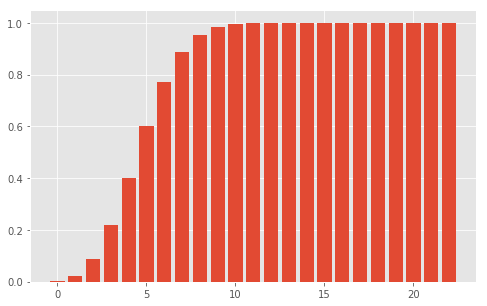

In [13]:
cdf_prob_k = [0 for x in range(0,23)]
for i in range(len(pmf_prob_k)):
    j=0
    while j <= i:
        cdf_prob_k[i] += pmf_prob_k[j]
        j += 1
cdf_prob_k

plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(pmf_k, cdf_prob_k)

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [14]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = round(np.mean(ratings),2)
median = np.median(ratings)
mode = stats.mode(ratings)
standard_deviation = round(np.std(ratings),2)
number_range = np.ptp(ratings)
interquartile_range = stats.iqr(ratings)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.69 
Median:  8.0 
Mode:  ModeResult(mode=array([8.]), count=array([8])) 
Standard Deviation:  2.35 
Range:  9.0 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [15]:
# Your written answer here

# to measure the centrality of this data, I would use the mode and the range to most fairly describe 
# the data given that 8 of the 18 integers are 8, but this alone wouldn't show the left most integers?

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

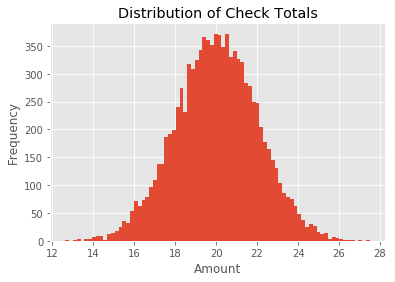

In [16]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [17]:
"""
    check_amt = the amount for which we want to compute the z-score
    
    """

def z_score(check_amt):
    z = (check_amt - 20)/(2/math.sqrt(1))
    return z

In [18]:
z_score(23)

1.5

In [19]:
p = 1-.93943
p

0.06057000000000001

In [20]:
z_score(24)

2.0

In [21]:
p = 1-.97982
p

0.020179999999999976

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [22]:
ans2 = False # p-value of .06 > .05, fail to reject Null
ans3 = True # p-value of .02 < .05, reject Null

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [26]:
stats.norm.interval(alpha = 0.95, loc = 20,scale = 2)                                

(16.080072030919894, 23.919927969080106)

In [24]:
# Your written answer here

# a confidence interval is the range between which we are 95% confident our sample means fall

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# Your written answer here

# if we take samples from our population of checks, calculate the means for each of those samples, the CLT 
# states that the sample means will approach a normal distribution as n approaches 30

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ $\mu$ $=$ $X_{Q}$

$H_{A}:$ $\mu$ $!=$ $X_{Q}$

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
# Your written answer here

# A type I error indicates a false positive, meaning we rejected the Null hypothesis when it was 
# actually true. In this case, a type I error would mean that the customers spend the same on Queso 
# as the average indicates, but we ended up rejecting the Null, so we claimed we observed 
# that customers spend more or less, with statistical significance

# A type II error indicates a false negative, meaning we failed to reject the Null hypothesis when it was 
# actually false. In this case, a type II error would mean that customers do in fact spend a different amount 
# on Queso than the average, but we failed to reject the Null, meaning we said we observed that customers
# spend the same as the average, with statistical significance

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

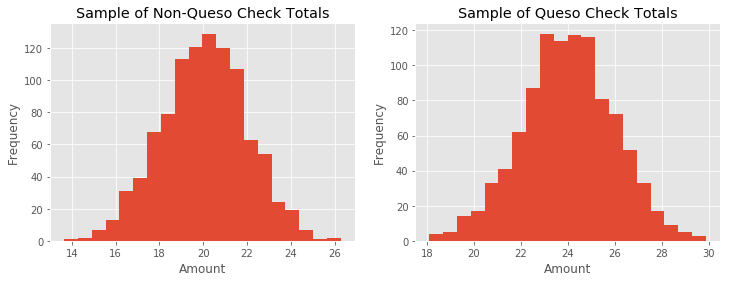

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [29]:
stats.ttest_ind(queso, no_queso)

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
# p-value is < .05, so we reject the Null. there 
# is statistical significance that the 
# samples are different

2. What are the conditions required to perform the test you chose?

In [ ]:
# Your written answer here

# the samples are independent, have equal variances
# data is approximately normal, sample sizes > 30 

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [32]:
ans1 = .6*.2+.1*.8
ans2 = .1*.2/((.1*.2)+(.55*.8))
ans3 = "more likely that he got the small puppy from the pound"
# prob of pet store/small = .2
# porb of pound/small = .4
ans4_prior = "probability of pet store"
ans4_posterior = "probability of pet store given large puppy"
ans4_likelihood = "probabilty of large puppy given pet store"

In [33]:
print(ans1)
print(ans2)

0.2
0.043478260869565216
